In [57]:
!pip install pyproj
!pip install quote

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gazpacho: filename=gazpacho-1.1-py3-none-any.whl size=7553 sha256=25a18312289a16d29d4512a7e6f420f87dfebf6f46f86468d44e86bad1dc4fce
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2b\49\33\b889bdad7e58b8a514eb3a47869eadb9ef67bd59a534b5e24d
Successfully built gazpacho


In [31]:
import requests
from pyproj import Transformer
import pandas as pd
import time
import quote
import matplotlib.pyplot as plt
import re

In [2]:
REST_API_KEY = "4db3265a5c03c2588fbe63994326574d"

In [ ]:
def get_coordinates_from_address(address):
    """
    도로명 주소를 카카오맵 API를 이용해 EPSG:4326 좌표로 변환하는 함수
    """
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {REST_API_KEY}"}

    encoded_address = quote.quote(address)
    params = {"query": address}

    try:
        response = requests.get(url, headers=headers, params=params)
        
        # HTTP 요청이 성공했는지 확인
        if response.status_code == 200:
            data = response.json()
            
            # 검색 결과가 있는지 확인
            if 'documents' in data and data['documents']:
                document = data['documents'][0]
                
                # EPSG:5181 좌표를 포함하는 'x'와 'y'를 추출
                x_coord = document.get('x')
                y_coord = document.get('y')
                
                return x_coord, y_coord
            else:
                print(f"주소 '{address}'에 대한 좌표를 찾을 수 없습니다.")
                return None, None
        else:
            print(f"API 요청 실패: {response.status_code}")
            print(response.json())
            return None, None
    except requests.exceptions.RequestException as e:
        print(f"네트워크 오류 발생: {e}")
        return None, None

def to_EPSG_5181(coord):
    transformer = Transformer.from_crs("epsg:4326", "epsg:5181")
    y, x = transformer.transform(float(coord[1]), float(coord[0]))
    return x, y
    

In [4]:
data1 = pd.read_csv(r"C:\Users\USER\PycharmProjects\Big-Contest\data1_hjd.csv", encoding="utf-8-sig")
data1["MCT_BSE_AR"]

0             서울특별시 성동구 마장동
1             서울특별시 성동구 마장동
2             서울특별시 성동구 마장동
3             서울특별시 성동구 마장동
4             서울특별시 성동구 마장동
               ...         
4171      서울특별시 성동구 마장로 137
4172     서울특별시 성동구 독서당로 223
4173    서울특별시 성동구 마장로35길 76
4174     서울특별시 성동구 왕십리로 410
4175       서울특별시 성동구 매봉길 50
Name: MCT_BSE_AR, Length: 4176, dtype: object

In [5]:
xs = []
ys = []
fail_addrs = []
i = 0

In [ ]:
for idx, adr in enumerate(pd.unique(data1["MCT_BSE_AR"])[i:], start=i):
	x_4326, y_4326 = get_coordinates_from_address(adr)
	if x_4326 != None:
		x, y = to_EPSG_5181(get_coordinates_from_address(adr))
		print(i, adr, "에 대한 좌표", x, y, "찾음")
		xs.append(x)
		ys.append(y)
	else:
		fail_addrs.append(adr)
	i = idx+1
	time.sleep(0.1)

2456 서울특별시 성동구 용답29길 28  에 대한 좌표 204730.3300000298 451711.3000000244 찾음


In [24]:
fail_addrs

['서울특별시 성동구 행당로 38',
 '서울특별시 성동구 매봉길 13',
 '서울특별시 성동구 천호대로 276',
 '서울특별시 성동구 용답중앙길 12',
 '서울특별시 성동구 자동차시장1길 82',
 '서울특별시 성동구 자동차시장1길 90',
 '서울특별시 성동구 용답25다길 23',
 '서울특별시 성동구 용답중앙길 78',
 '서울특별시 성동구 마장로40길 11-1']

In [18]:
data1[data1["MCT_BSE_AR"].isin(fail_addrs)]

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,HJD_CODE
114,C64FD46BFC,서울특별시 성동구 행당로 38,덕흥***,NaN,서울 성동구,축산물,NaN,20001012,NaN,1.120056e+09
170,05992E2BE5,서울특별시 성동구 매봉길 13,락앤*****,중식당1,서울 성동구,중식당,NaN,20140507,NaN,1.120064e+09
556,862A6A9582,서울특별시 성동구 천호대로 276,일인**,NaN,서울 성동구,한식-단품요리일반,답십리,20130212,NaN,1.120079e+09
782,622D27CE49,서울특별시 성동구 용답중앙길 12,대광**,NaN,서울 성동구,미곡상,답십리,20050411,NaN,1.120079e+09
1762,A4D5BDDEDF,서울특별시 성동구 자동차시장1길 82,제일**,NaN,서울 성동구,백반/가정식,답십리,20121204,NaN,1.120079e+09
1763,202F736EBC,서울특별시 성동구 자동차시장1길 90,화목***,NaN,서울 성동구,백반/가정식,장한평자동차,20131202,NaN,1.120079e+09
2759,2402B1EA00,서울특별시 성동구 자동차시장1길 82,장안**,NaN,서울 성동구,백반/가정식,답십리,20120316,NaN,1.120079e+09
3080,E2BDC284DA,서울특별시 성동구 용답25다길 23,푸른******,NaN,서울 성동구,한식-해물/생선,답십리,20180608,20250723.0,1.120079e+09
3081,58168DBBE0,서울특별시 성동구 용답25다길 23,못말****,NaN,서울 성동구,일식-우동/소바/라면,답십리,20190314,NaN,1.120079e+09
3095,844C36220E,서울특별시 성동구 용답중앙길 78,꿀단****,NaN,서울 성동구,한식-육류/고기,답십리,20220427,NaN,1.120079e+09


In [21]:
def modify_addr(mct_id, new_addr, df=data1):
	df.loc[df["ENCODED_MCT"]==mct_id, "MCT_BSE_AR"] = new_addr

modify_addr("C64FD46BFC", "서울 성동구 행당로6길 2")
modify_addr("05992E2BE5", "서울 성동구 독서당로 223")
modify_addr("862A6A9582", "서울 성동구 독서당로 223")
modify_addr("A4D5BDDEDF", "서울 성동구 자동차시장1길 70")
modify_addr("202F736EBC", "서울 성동구 자동차시장1길 91")
modify_addr("E2BDC284DA", "서울 성동구 용답25라길 23")
modify_addr("58168DBBE0	", "서울 성동구 용답19길 7")

In [22]:
data1[data1["MCT_BSE_AR"].isin(fail_addrs)]

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,HJD_CODE
782,622D27CE49,서울특별시 성동구 용답중앙길 12,대광**,NaN,서울 성동구,미곡상,답십리,20050411,NaN,1.120079e+09
2759,2402B1EA00,서울특별시 성동구 자동차시장1길 82,장안**,NaN,서울 성동구,백반/가정식,답십리,20120316,NaN,1.120079e+09
3081,58168DBBE0,서울특별시 성동구 용답25다길 23,못말****,NaN,서울 성동구,일식-우동/소바/라면,답십리,20190314,NaN,1.120079e+09
3095,844C36220E,서울특별시 성동구 용답중앙길 78,꿀단****,NaN,서울 성동구,한식-육류/고기,답십리,20220427,NaN,1.120079e+09
3624,CECDA06CB5,서울특별시 성동구 마장로40길 11-1,가보***,NaN,서울 성동구,백반/가정식,NaN,20190304,NaN,1.120054e+09


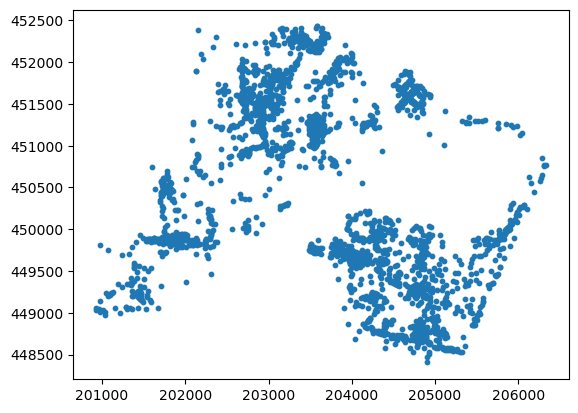

In [16]:
plt.scatter(xs, ys, s=10)
plt.show()

In [32]:
# 파일 경로
path = r"C:\Users\USER\PycharmProjects\Big-Contest\data\raw\0 서울특별시 성동구 마장동 에 대한 좌표 204004.3999.txt"

# 파일 읽기
with open(path, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []
pattern = re.compile(r"^\d+\s+(.*?)\s+에 대한 좌표\s+([\d\.]+)\s+([\d\.]+)\s+찾음")

for line in lines:
    match = pattern.match(line.strip())
    if match:
        address, x, y = match.groups()
        data.append([address, float(x), float(y)])

# DataFrame 생성
doro_coord = pd.DataFrame(data, columns=["주소", "x", "y"])

# 결과 미리보기
print(doro_coord.head())

              주소         x         y
0  서울특별시 성동구 마장동  204004.4  451872.4
1  서울특별시 성동구 사근동  204004.8  451330.8
2  서울특별시 성동구 송정동  206147.2  450558.8
3  서울특별시 성동구 용답동  204910.4  451617.2
4  서울특별시 성동구 행당동  203272.0  450976.0


In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4176 non-null   object 
 1   MCT_BSE_AR          4176 non-null   object 
 2   MCT_NM              4176 non-null   object 
 3   MCT_BRD_NUM         541 non-null    object 
 4   MCT_SIGUNGU_NM      4176 non-null   object 
 5   HPSN_MCT_ZCD_NM     4176 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  3136 non-null   object 
 7   ARE_D               4176 non-null   int64  
 8   MCT_ME_D            127 non-null    float64
 9   HJD_CODE            4176 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 326.4+ KB


In [42]:
data1_coord = data1.merge(doro_coord, how='left', left_on="MCT_BSE_AR", right_on="주소")
data1_coord_isna = data1_coord[data1_coord["x"].isna()]
data1_coord_isna

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,HJD_CODE,주소,x,y
209,C64FD46BFC,서울 성동구 행당로6길 2,덕흥***,NaN,서울 성동구,축산물,NaN,20001012,NaN,1.120056e+09,NaN,NaN,NaN
346,05992E2BE5,서울 성동구 독서당로 223,락앤*****,중식당1,서울 성동구,중식당,NaN,20140507,NaN,1.120064e+09,NaN,NaN,NaN
487,6DF56DD3F4,서울특별시 성동구 금호로 40,커스*******,NaN,서울 성동구,커피전문점,NaN,20160202,NaN,1.120062e+09,NaN,NaN,NaN
506,E1B7CDD2A1,서울특별시 성동구 동호로 93,비에***************,치킨3,서울 성동구,치킨,NaN,20061019,NaN,1.120062e+09,NaN,NaN,NaN
507,96A00BF6D0,서울특별시 성동구 동호로 93,파리********,베이커리10,서울 성동구,베이커리,NaN,20240426,NaN,1.120062e+09,NaN,NaN,NaN
584,48731DE9B9,서울특별시 성동구 마조로 17,우리******,NaN,서울 성동구,치킨,한양대,20120201,20250707.0,1.120055e+09,NaN,NaN,NaN
585,51DB10788F,서울특별시 성동구 마조로 35,버거*,NaN,서울 성동구,햄버거,한양대,20160901,NaN,1.120055e+09,NaN,NaN,NaN
696,382A324F7A,서울특별시 성동구 행당로 87,낙원**,NaN,서울 성동구,떡/한과 제조,행당,20160516,NaN,1.120057e+09,NaN,NaN,NaN
697,0E33FFCD65,서울특별시 성동구 행당로 89,이영******,NaN,서울 성동구,분식,행당,20210617,NaN,1.120057e+09,NaN,NaN,NaN
764,F1039455F0,서울특별시 성동구 금호로 127,목포**,NaN,서울 성동구,한식-육류/고기,신금호,20160622,NaN,1.120062e+09,NaN,NaN,NaN


In [46]:
addrs = []
xs = []
ys = []
fail_addrs = []
i = 0

In [47]:
for idx, adr in enumerate(pd.unique(data1_coord_isna["MCT_BSE_AR"])[i:], start=i):
	x_4326, y_4326 = get_coordinates_from_address(adr)
	if x_4326 != None:
		x, y = to_EPSG_5181(get_coordinates_from_address(adr))
		print(i, adr, "에 대한 좌표", x, y, "찾음")
		addrs.append(adr)
		xs.append(x)
		ys.append(y)
	else:
		fail_addrs.append(adr)
	i = idx+1
	time.sleep(0.1)

0 서울 성동구 행당로6길 2 에 대한 좌표 202241.86000002665 450652.44000001607 찾음
1 서울 성동구 독서당로 223 에 대한 좌표 201342.5600000236 449417.7300000214 찾음
2 서울특별시 성동구 금호로 40  에 대한 좌표 202256.35000001529 449688.1600000183 찾음
3 서울특별시 성동구 동호로 93  에 대한 좌표 201361.05999999307 449786.36000002344 찾음
4 서울특별시 성동구 마조로 17  에 대한 좌표 203575.7200000114 451114.84000002325 찾음
5 서울특별시 성동구 마조로 35  에 대한 좌표 203637.51999997586 451260.67000002135 찾음
6 서울특별시 성동구 행당로 87  에 대한 좌표 202522.1099999762 450863.22000002576 찾음
7 서울특별시 성동구 행당로 89  에 대한 좌표 202549.63999999798 450878.4100000178 찾음
8 서울특별시 성동구 금호로 127  에 대한 좌표 201977.41000000684 450406.8399999952 찾음
9 서울특별시 성동구 동일로 123  에 대한 좌표 205695.24999997544 449353.20000002545 찾음
10 서울특별시 성동구 동일로 143  에 대한 좌표 205774.1999999672 449548.120000014 찾음
11 서울특별시 성동구 동호로 104  에 대한 좌표 201404.51000003848 449844.13000002305 찾음
12 서울특별시 성동구 뚝섬로 327  에 대한 좌표 204191.1800000154 449060.32000002096 찾음
13 서울특별시 성동구 마장로 296  에 대한 좌표 203777.53000003682 451797.1200000188 찾음
14 서울특별시 성동구 마장로 309  에 대한 좌표 203850.1700

In [50]:
doro_coord_2_dict = {
	'주소' : addrs,
	'x' : xs,
	'y' : ys
}

doro_coord_2 = pd.DataFrame(doro_coord_2_dict)
doro_coord_fin = pd.concat([doro_coord, doro_coord_2], ignore_index=True)


In [53]:
data1_coord = data1.merge(doro_coord_fin, how='left', left_on="MCT_BSE_AR", right_on="주소")
data1_coord


,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,HJD_CODE,주소,x,y
0,16184E93D9,서울특별시 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40
1,4D039EA8B7,서울특별시 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40
2,0074C4990A,서울특별시 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40
3,68308F2746,서울특별시 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40
4,4117EDDE9C,서울특별시 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,F1C69918DF,서울특별시 성동구 왕십리로 410,국수**,한식-국수/만두3,서울 성동구,한식-국수/만두,NaN,20211007,NaN,1.120054e+09,서울특별시 성동구 왕십리로 410,202127.61,451896.50
8744,F1C69918DF,서울특별시 성동구 왕십리로 410,국수**,한식-국수/만두3,서울 성동구,한식-국수/만두,NaN,20211007,NaN,1.120054e+09,서울특별시 성동구 왕십리로 410,202127.61,451896.50
8745,F1C69918DF,서울특별시 성동구 왕십리로 410,국수**,한식-국수/만두3,서울 성동구,한식-국수/만두,NaN,20211007,NaN,1.120054e+09,서울특별시 성동구 왕십리로 410,202127.61,451896.50
8746,58B8C943BF,서울특별시 성동구 매봉길 50,아이******,NaN,서울 성동구,아이스크림/빙수,NaN,20230303,NaN,1.120064e+09,서울특별시 성동구 매봉길 50,201077.17,449753.78


In [49]:
data1_coord = data1_coord.merge(doro_coord_2, how='left', left_on="MCT_BSE_AR", right_on="addrs")
data1_coord

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,HJD_CODE,주소,x_x,y_x,addrs,x_y,y_y
0,16184E93D9,서울특별시 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40,NaN,NaN,NaN
1,4D039EA8B7,서울특별시 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40,NaN,NaN,NaN
2,0074C4990A,서울특별시 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40,NaN,NaN,NaN
3,68308F2746,서울특별시 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40,NaN,NaN,NaN
4,4117EDDE9C,서울특별시 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN,1.120054e+09,서울특별시 성동구 마장동,204004.40,451872.40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,F1C69918DF,서울특별시 성동구 왕십리로 410,국수**,한식-국수/만두3,서울 성동구,한식-국수/만두,NaN,20211007,NaN,1.120054e+09,서울특별시 성동구 왕십리로 410,202127.61,451896.50,NaN,NaN,NaN
8744,F1C69918DF,서울특별시 성동구 왕십리로 410,국수**,한식-국수/만두3,서울 성동구,한식-국수/만두,NaN,20211007,NaN,1.120054e+09,서울특별시 성동구 왕십리로 410,202127.61,451896.50,NaN,NaN,NaN
8745,F1C69918DF,서울특별시 성동구 왕십리로 410,국수**,한식-국수/만두3,서울 성동구,한식-국수/만두,NaN,20211007,NaN,1.120054e+09,서울특별시 성동구 왕십리로 410,202127.61,451896.50,NaN,NaN,NaN
8746,58B8C943BF,서울특별시 성동구 매봉길 50,아이******,NaN,서울 성동구,아이스크림/빙수,NaN,20230303,NaN,1.120064e+09,서울특별시 성동구 매봉길 50,201077.17,449753.78,NaN,NaN,NaN


In [55]:
data1_coord_isna = data1_coord[data1_coord["x"].isna()]
data1_coord_isna

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,HJD_CODE,주소,x,y
1603,622D27CE49,서울특별시 성동구 용답중앙길 12,대광**,NaN,서울 성동구,미곡상,답십리,20050411,NaN,1.120079e+09,NaN,NaN,NaN
5821,2402B1EA00,서울특별시 성동구 자동차시장1길 82,장안**,NaN,서울 성동구,백반/가정식,답십리,20120316,NaN,1.120079e+09,NaN,NaN,NaN
6463,58168DBBE0,서울특별시 성동구 용답25다길 23,못말****,NaN,서울 성동구,일식-우동/소바/라면,답십리,20190314,NaN,1.120079e+09,NaN,NaN,NaN
6490,844C36220E,서울특별시 성동구 용답중앙길 78,꿀단****,NaN,서울 성동구,한식-육류/고기,답십리,20220427,NaN,1.120079e+09,NaN,NaN,NaN
7553,CECDA06CB5,서울특별시 성동구 마장로40길 11-1,가보***,NaN,서울 성동구,백반/가정식,NaN,20190304,NaN,1.120054e+09,NaN,NaN,NaN


In [56]:
data1_coord.dropna(subset=["x"], inplace=True)

In [57]:
data1_coord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8743 entries, 0 to 8747
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         8743 non-null   object 
 1   MCT_BSE_AR          8743 non-null   object 
 2   MCT_NM              8743 non-null   object 
 3   MCT_BRD_NUM         1166 non-null   object 
 4   MCT_SIGUNGU_NM      8743 non-null   object 
 5   HPSN_MCT_ZCD_NM     8743 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  6473 non-null   object 
 7   ARE_D               8743 non-null   int64  
 8   MCT_ME_D            265 non-null    float64
 9   HJD_CODE            8743 non-null   float64
 10  주소                  8743 non-null   object 
 11  x                   8743 non-null   float64
 12  y                   8743 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 956.3+ KB


In [60]:
data1_coord.drop("주소", axis=1, inplace=True)

In [61]:
data1_coord.rename(columns={"x":"X", "y":"Y"}, inplace=True)

In [62]:
data1_coord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8743 entries, 0 to 8747
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         8743 non-null   object 
 1   MCT_BSE_AR          8743 non-null   object 
 2   MCT_NM              8743 non-null   object 
 3   MCT_BRD_NUM         1166 non-null   object 
 4   MCT_SIGUNGU_NM      8743 non-null   object 
 5   HPSN_MCT_ZCD_NM     8743 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  6473 non-null   object 
 7   ARE_D               8743 non-null   int64  
 8   MCT_ME_D            265 non-null    float64
 9   HJD_CODE            8743 non-null   float64
 10  X                   8743 non-null   float64
 11  Y                   8743 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 888.0+ KB


In [63]:
data1_coord.to_csv("data1_hjd_coord.csv", index=False, encoding='utf-8-sig')